# Consigna: Implementar al menos uno de los algoritmos de clasificación vistos en la sesión de hoy con el dataset propuesto para el proyecto final del curso.

**1) En primer lugar, importamos las librerías a utilizar:**

In [2]:
import urllib.request
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree
#from sklearn.inspection import DecisionBoundaryDisplay
import numpy as np

**2) A continuación leemos el dataframe final , resultante del análisis y tratamiento de la 1° entrega del Proyecto Final:**

In [3]:
df_final_heart_disease = pd.read_csv('data_heart_final.csv')
df_final_heart_disease

,Unnamed: 0,edad,dolor_de_pecho,presion_en_reposo,colesterol_mg_dl,glucemia_en_ayunas,resultados_electrocardiograficos_en_reposo,frecuencia_cardiaca_maxima_alcanzada,depresion_st_ejercicio_segun_reposo,maxima_pendiente_st_ejercicio,vasos_principales_coloreados,talasemia,enfermo_cardiaco,sexo,angina_por_ejercicio
0,0,52,3,125,212,0,2,168,1.0,0,2,2,0,1,1
1,1,53,3,140,203,1,1,155,3.1,2,0,2,0,1,0
2,2,70,3,145,174,0,2,125,2.6,2,0,2,0,1,0
3,3,61,3,148,203,0,2,161,0.0,0,1,2,0,1,1
4,4,62,3,138,294,1,2,106,1.9,1,3,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1020,59,1,140,221,0,2,164,0.0,0,0,1,1,1,0
996,1021,60,3,125,258,0,1,141,2.8,1,1,2,0,1,0
997,1022,47,3,110,275,0,1,118,1.0,1,1,1,0,1,0
998,1023,50,3,110,254,0,1,159,0.0,0,0,1,1,0,1


**3) A continuación visualizamos información útil del mismo:**

In [4]:
df_final_heart_disease.shape

(1000, 15)

In [5]:
df_final_heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Unnamed: 0                                  1000 non-null   int64  
 1   edad                                        1000 non-null   int64  
 2   dolor_de_pecho                              1000 non-null   int64  
 3   presion_en_reposo                           1000 non-null   int64  
 4   colesterol_mg_dl                            1000 non-null   int64  
 5   glucemia_en_ayunas                          1000 non-null   int64  
 6   resultados_electrocardiograficos_en_reposo  1000 non-null   int64  
 7   frecuencia_cardiaca_maxima_alcanzada        1000 non-null   int64  
 8   depresion_st_ejercicio_segun_reposo         1000 non-null   float64
 9   maxima_pendiente_st_ejercicio               1000 non-null   int64  
 10  vasos_princip

**4) Insights:**\
**a) El dataset se compone de 14 columnas de las cuales, una de ellas es la que usaremos para predecir el target.**\
**b) "enfermo_cardiaco" es la variable a predecir. Todas las variables son numéricas, ya sea enteras o reales.**

**5) Entonces, separamos el dataframe en las variables X e y:**

In [6]:
X = df_final_heart_disease.drop(["enfermo_cardiaco"], axis=1)
y = df_final_heart_disease["enfermo_cardiaco"]

**6) Ahora , separamos en Train y Test:**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

**7) A continuación, creamos un árbol de decisión sencillo y lo fiteamos:**

In [8]:
arbol_de_decision = DecisionTreeClassifier(random_state = 42)
#max_depth=2, 
#tree = DecisionTreeClassifier(random_state=11)
arbol_de_decision.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

**8) Ahora realizamos la predicción para Test y Train:**


In [9]:
y_train_pred = arbol_de_decision.predict(X_train)
y_test_pred = arbol_de_decision.predict(X_test)

**9) En este paso, calculamos el accuracy en Test:**

In [10]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'El % de aciertos sobre el set de entrenamiento: {round(train_accuracy,2)}%')
print(f'El % de aciertos sobre el set de evaluación: {round(test_accuracy,2)}%')

El % de aciertos sobre el set de entrenamiento: 1.0%
El % de aciertos sobre el set de evaluación: 0.98%


**10) Visualizamos la matriz de confusión:**

In [11]:
matriz = confusion_matrix(y_test, y_test_pred)
print('Matriz de Confusión del árbol de decisión:')
print(matriz)

Matriz de Confusión del árbol de decisión:
[[135   3]
 [  3 159]]


**11) Graficamos el arbol de decisión:**

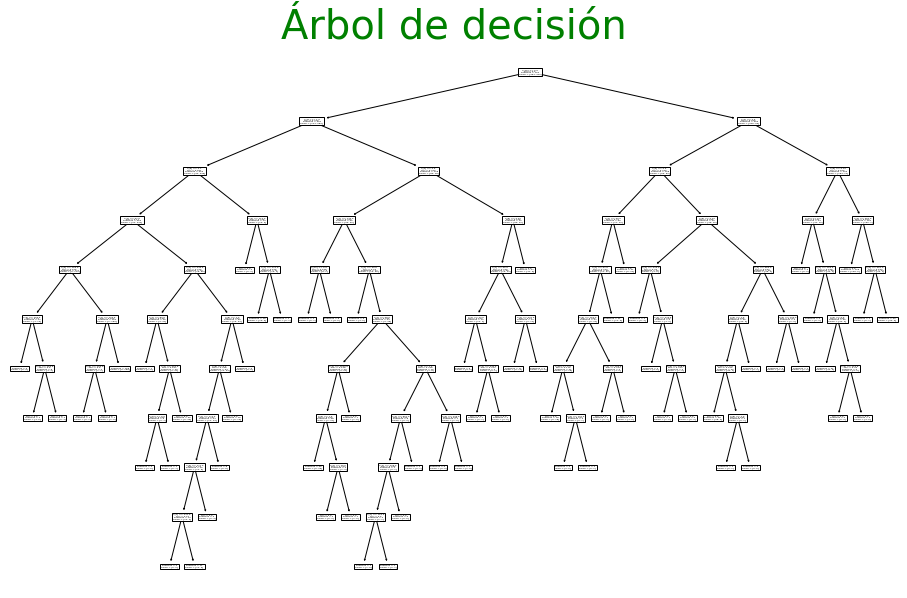

In [12]:
plt.figure(figsize=(16,10)) 
tree.plot_tree(arbol_de_decision.fit(X_train,y_train))
plt.title(label="Árbol de decisión",
           fontsize=40,
           color="green")
plt.show()

**12) Ahora creamos el modelo Randon Forest:**

In [13]:
model = RandomForestClassifier(random_state=11, n_estimators=200,
                               class_weight="balanced", max_features="log2")
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=200, random_state=11)

**13) Predecimos en test y train:**

In [14]:
y_train_pred_randomF = model.predict(X_train)
y_test_pred_randomF = model.predict(X_test)

**14) Cálculo de Accuracy para Test y Train:**


In [15]:
train_accuracy = accuracy_score(y_train, y_train_pred_randomF)
test_accuracy = accuracy_score(y_test, y_test_pred_randomF)
print(f'El % de aciertos sobre el set de entrenamiento: {round(train_accuracy,2)}%')
print(f'El % de aciertos sobre el set de evaluación: {round(test_accuracy,2)}%')

El % de aciertos sobre el set de entrenamiento: 1.0%
El % de aciertos sobre el set de evaluación: 1.0%


**15) Calculamos la matriz de confusión:**

In [16]:
matriz2 = confusion_matrix(y_test, y_test_pred)
print('Matriz de Confusión del random forest:')
print(matriz2)

Matriz de Confusión del random forest:
[[135   3]
 [  3 159]]


**16) Graficamos el modelo de Random Forest:**

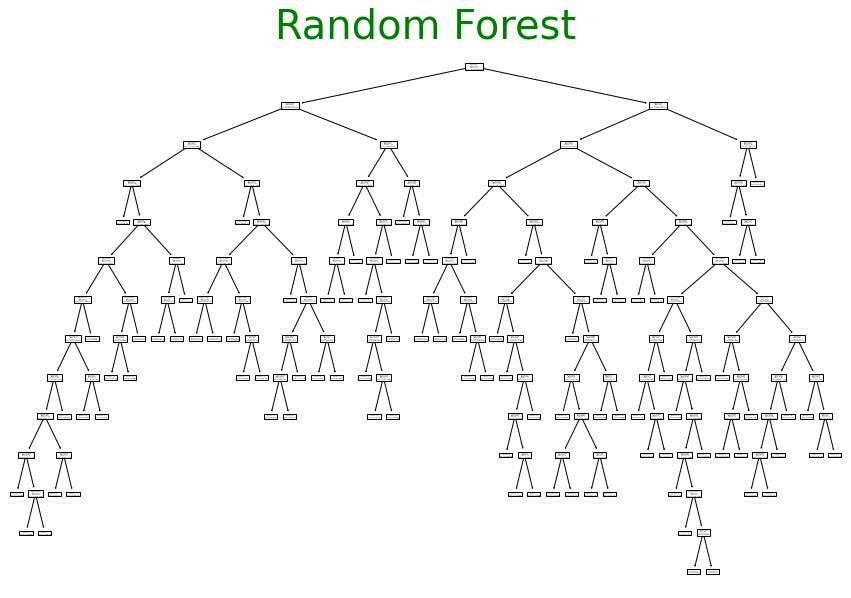

In [17]:
fig = plt.figure(figsize=(15, 10))
tree.plot_tree(model.estimators_[10])
plt.title(label="Random Forest",
           fontsize=40,
           color="green")
plt.show()

**17) Ahora, trabajaremos con la Regresión logistica. Por ello, graficamos un Scatter plot:**

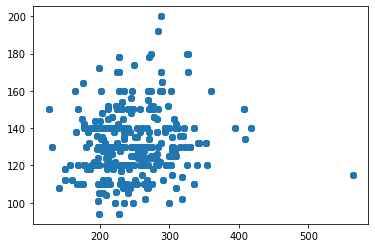

In [18]:
plt.scatter(df_final_heart_disease.colesterol_mg_dl, df_final_heart_disease.presion_en_reposo)
plt.show()

**18) A continuacion, hacemos la division para train y test de las variables dependientes e independientes:**

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df_final_heart_disease.colesterol_mg_dl, df_final_heart_disease.presion_en_reposo, test_size=0.30)

**19) Ahora entrenamos el modelo de regresion logistica:**

El primer paso es crear una instancia de las Regresion logistica:

In [20]:
regresion_logistica = LogisticRegression()

El segundo paso es entrenar la regresión logística con los datos de entrenamiento

In [21]:
regresion_logistica.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1).ravel())

C:\Users\doloc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**20) Ahora predecimos:**

In [22]:
y_pred = regresion_logistica.predict(X_test.values.reshape(-1, 1))

**21) Graficamos el modelo:**

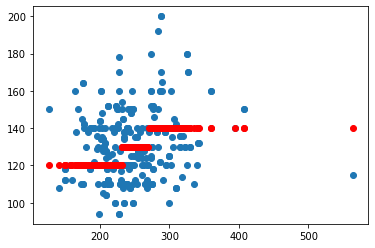

In [23]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, c='red')
plt.show()

**22) Calculamos el accuracy para este modelo:**

In [24]:
accuracy = regresion_logistica.score(X_test.values.reshape(-1, 1), y_test.values.reshape(-1, 1))


In [25]:
print(f"Accuracy = {accuracy}")

Accuracy = 0.13666666666666666
